<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/AnberW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
print("--- Step 1: Automatic Data Loading & Preprocessing ---")

# 1. Load Data
url = "https://raw.githubusercontent.com/basilatawneh/Students-Academic-Performance-Dataset-xAPI-Edu-Data-/master/xAPI-Edu-Data.csv"
try:
    df = pd.read_csv(url)
except:
    raise SystemExit("Stop: Check internet connection.")

--- Step 1: Automatic Data Loading & Preprocessing ---


In [3]:
# 2. Cleaning & Encoding
df.rename(columns={'NationalITy': 'Nationality', 'raisedhands': 'raised_hands', 'VisITedResources': 'visited_resources'}, inplace=True)
class_map = {'L': 0, 'M': 1, 'H': 2}
df['class_label_encoded'] = df['Class'].map(class_map)

In [4]:
# 3. Features
features = ['raised_hands', 'visited_resources', 'AnnouncementsView', 'Discussion',
            'StudentAbsenceDays', 'ParentAnsweringSurvey', 'Relation', 'gender']
X = pd.get_dummies(df[features], drop_first=True)
y = df['class_label_encoded']

In [5]:
# 4. Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Loaded. Input Shape: (384, 8)

--- Step 2: Advanced Model Configuration ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting Training with Early Stopping...
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
Training stopped at Epoch 26

--- Step 3: Evaluation of the BEST Model ---
Optimized ANN Accuracy: 77.08%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


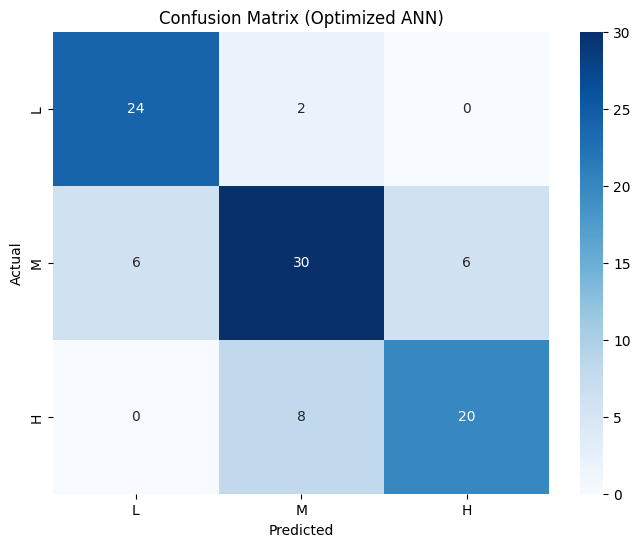

In [6]:
# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Data Loaded. Input Shape:", X_train.shape)

print("\n--- Step 2: Advanced Model Configuration ---")

# Define Model (Slightly deeper/wider to allow for complexity)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Wider layer (128 neurons)
    Dropout(0.4), # Increased Dropout to fight overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Define Callbacks (The Week 10 Upgrade)
# 1. EarlyStopping: Stop training if 'val_loss' doesn't improve for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 2. ModelCheckpoint: Save the BEST model seen during training
checkpoint = ModelCheckpoint('best_student_model.keras', monitor='val_accuracy', save_best_only=True, verbose=0)

# Compile with a specific Learning Rate
opt = Adam(learning_rate=0.001) # We control the speed of learning
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Starting Training with Early Stopping...")
# We set epochs=100, but EarlyStopping will likely stop it sooner!
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint],
                    verbose=0)

print(f"Training stopped at Epoch {len(history.history['loss'])}")

print("\n--- Step 3: Evaluation of the BEST Model ---")

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Optimized ANN Accuracy: {accuracy*100:.2f}%")

# Confusion Matrix Visualization
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['L', 'M', 'H'], yticklabels=['L', 'M', 'H'])
plt.title('Confusion Matrix (Optimized ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()